# Visualization of Model Results

In this analysis, we split the labeled data (`train/` on Kaggle) into training \& validation (80\% together), and testing set (20\%). We performed training and model selection using the 80\% partition. This Jupyter Notebook forcuses on these 80\% training and validation data. The n=3200 hold-out test set is separately explored in another Notebook.

The results below display:

* Training loss vs. epoch
* Validation loss vs. epoch

for each of the 2 **experimental models** (either deeper or pre-trained) or the **control model** (ResNet-50, no pre-training).

In [1]:
import numpy as np 
import pandas as pd
from pathlib import Path
import os
import warnings
import pickle

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## Constants:
KAGGLE = False;
PREFIX = "/kaggle/" if KAGGLE else "../";

DATA_DIR = Path(PREFIX+'input/imaterialist-fashion-2020-fgvc7/');
IMG_DIR = Path(PREFIX+'input/imaterialist-fashion-2020-fgvc7/train/');
RESULTS_DIR = Path(PREFIX + 'results/experiments');

## Load data:
df_train = pd.read_csv(DATA_DIR/'train.csv')
df_train.head()

def sketch_losses(epochs, history, title=None):
    plt.figure(figsize=(6,6), dpi=100);
    plt.plot(epochs, history["loss"], label="Training");
    plt.plot(epochs, history["val_loss"], label="Validation");
    plt.xlabel("Epoch", fontsize=15);
    plt.ylabel("Loss", fontsize=15);
    if title is not None:
        plt.title(title);
    plt.legend(fontsize=15);
    plt.show();

## Training & Validation Curves for Each Experimental Group

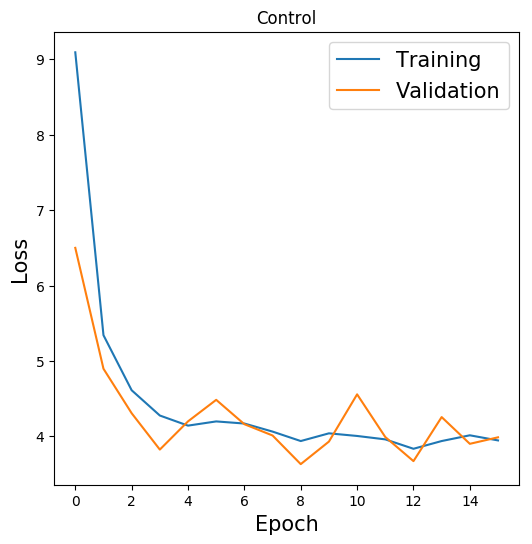

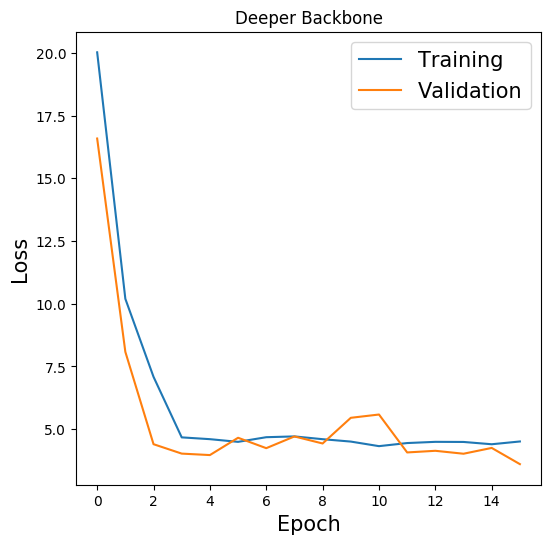

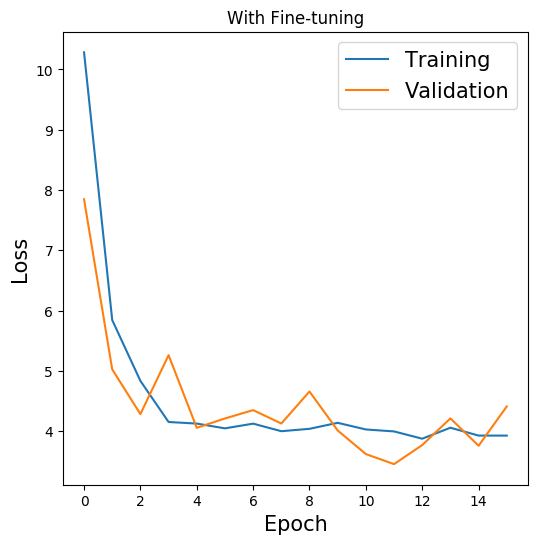

In [3]:
EPOCHS = range(0, 16);
NAMES = {"Control":"saved_head_model_history_scratch_resnet50.pkl", 
         "Deeper Backbone": "saved_head_model_history_scratch_resnet101.pkl", 
         "With Fine-tuning":"saved_head_model_history_pretrained_resnet50.pkl"};

for k,v in NAMES.items():
    hist = pickle.load(open(RESULTS_DIR/v,'rb')); 
    sketch_losses(EPOCHS, hist, k)

## Conclusions

The choice of 16 epochs appear reasonable, and behaves very similarly between pre-trained vs. non-pretrained models on the training & validation set.

Next Up: Check performance on hold-out test set